In [46]:
import numpy as np
from scipy.integrate import quad

# Assuming df is your DataFrame with columns A, B, and C
# Replace 'A', 'B', 'C' with the actual column names if different

# Function for the Gaussian curve
def gaussian_curve(x, A, B, C):
    return A * np.exp(-((x - B) ** 2) / (C ** 2))

# Function to integrate the Gaussian curve
def integrate_gaussian(row):
    A = row['A']
    B = row['B']
    C = row['C']

    # Define the integration limits, for example, from -infinity to +infinity
    integration_limits = [-np.inf, np.inf]

    # Use quad to perform numerical integration
    result, _ = quad(gaussian_curve, *integration_limits, args=(A, B, C))
    return result

In [51]:
import pandas as pd
df = pd.read_excel('result_.xlsx')
df 

,C1,B2,B1,A2,C2,A1,T(K),Time (s),S1,S2
0,0.242219,2.470929,1.832329,14509.601990,0.044194,40766.670243,85.104240,0,17483.402299,1135.418715
1,0.241965,2.470952,1.832378,14486.294089,0.044161,40765.317953,85.104240,4,17464.649682,1132.762399
2,0.242217,2.470942,1.832334,14496.217101,0.044291,40794.652516,85.104240,8,17495.252298,1136.836732
3,0.242280,2.470983,1.832385,14463.009040,0.044350,40678.371378,85.104240,12,17449.797492,1135.726527
4,0.242048,2.470996,1.832345,14506.833678,0.044172,40731.071106,85.104240,15,17455.873084,1134.641048
...,...,...,...,...,...,...,...,...,...,...
1647,0.241379,2.440709,1.790132,11114.191445,0.045244,24926.327872,270.296102,8479,10659.424862,885.629894
1648,0.241126,2.440620,1.790082,11103.743798,0.045114,24894.259970,270.399369,8491,10634.609690,882.332762
1649,0.241124,2.440697,1.790125,11080.880038,0.045130,24869.270418,270.476820,8497,10623.841038,880.843765
1650,0.241050,2.440639,1.790119,11096.126366,0.045074,24848.426161,270.528453,8503,10611.720005,880.986730


In [54]:
preds  = pd.read_excel(r'C:\Users\ivan\WORK\CdSe\models\Elastic Net CV\Elastic Net CV_2.xlsx')

In [55]:
preds

,Unnamed: 0,Time (s),A1,B1,C1,A2,B2,C2
0,0,0,35850.166412,1.821219,0.241858,13669.539537,2.467204,0.046026
1,1,1,35850.166202,1.821219,0.241858,13669.539472,2.467204,0.046026
2,2,2,35850.165570,1.821219,0.241858,13669.539278,2.467204,0.046026
3,3,3,35850.164518,1.821219,0.241858,13669.538953,2.467204,0.046026
4,4,4,35850.163044,1.821219,0.241858,13669.538499,2.467204,0.046026
...,...,...,...,...,...,...,...,...
10796,10796,10796,11311.286607,1.740771,0.242380,6102.216926,2.415254,0.045498
10797,10797,10797,11306.740475,1.740756,0.242381,6100.814986,2.415244,0.045497
10798,10798,10798,11302.193923,1.740741,0.242381,6099.412916,2.415235,0.045497
10799,10799,10799,11297.646950,1.740726,0.242381,6098.010716,2.415225,0.045497


In [56]:
import numpy as np
from scipy.integrate import quad
import pandas as pd

# Define the Gaussian curve function
def gaussian_curve(x, A, B, C):
    return A * np.exp(-((x - B) ** 2) / (C ** 2))

# Define the function to integrate the Gaussian curve
def integrate_gaussian(row):
    A = row['A1']
    B = row['B1']
    C = row['C1']
    integration_limits = [-np.inf, np.inf]
    result, _ = quad(gaussian_curve, *integration_limits, args=(A, B, C))
    return result

# Assuming preds is your DataFrame with columns A1, B1, and C1
# Replace 'A1', 'B1', 'C1' with the actual column names if different

# Calculate the areas under the Gaussian curves for each row
preds['Area'] = preds.apply(integrate_gaussian, axis=1)


In [57]:
preds2 = pd.read_excel(r'C:\Users\ivan\WORK\CdSe\models\Ridge\Ridge_4.xlsx')
# Calculate the areas under the Gaussian curves for each row
preds2['Area'] = preds2.apply(integrate_gaussian, axis=1)

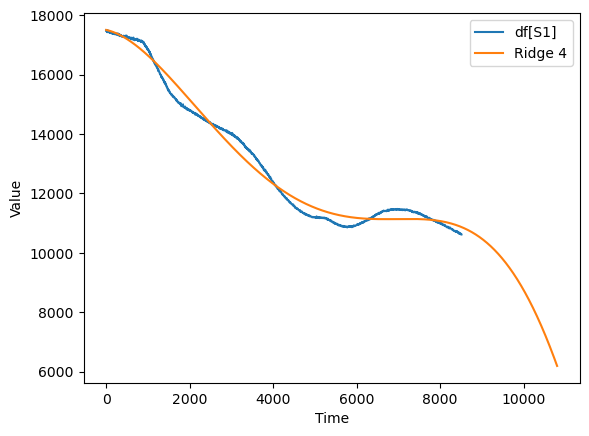

In [20]:
import matplotlib.pyplot as plt

# Assuming df and preds are your DataFrames

# Plot df['S1'] vs df['time']
plt.plot(df['Time (s)'], df['S1'], label='df[S1]')


# Plot preds['Area'] vs preds['time']
#plt.plot(preds['Time (s)'], preds['Area'], label='Elastic CV 2')
plt.plot(preds2['Time (s)'], preds2['Area'], label='Ridge 4')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Value')
#plt.title('Comparison of df[S1] and preds[Area]')
plt.legend()

# Show the plot
plt.show()


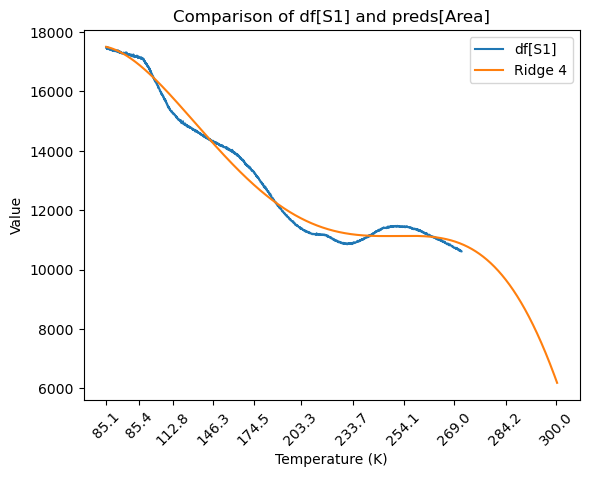

In [62]:
import matplotlib.pyplot as plt

# Plot df['S1'] vs temperature from df_new
plt.plot(df['Time (s)'], df['S1'], label='df[S1]')

# Plot preds2['Area'] vs temperature from df_new
plt.plot(preds2['Time (s)'], preds2['Area'], label='Ridge 4')


# Select 10 evenly spaced temperature values
temp_values = df_new['T(K)'].round(1)
step = max(len(temp_values) // 10, 1)  # Determine step size
temp_values = temp_values[::step]  # Select every 'step' value



# Set temperature values as x-axis ticks
plt.xticks(df_new['Time (s)'][::step], temp_values)



# Set labels and title
plt.xlabel('Temperature (K)')
plt.ylabel('Value')
plt.title('Comparison of df[S1] and preds[Area]')

# Show the legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()



In [27]:
df_new = df[['T(K)', 'Time (s)']]
df_new

,T(K),Time (s)
0,85.104240,0
1,85.104240,4
2,85.104240,8
3,85.104240,12
4,85.104240,15
...,...,...
1647,270.296102,8479
1648,270.399369,8491
1649,270.476820,8497
1650,270.528453,8503


In [28]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

# Assuming df_new is your DataFrame

# Extrapolation time range
extrapolation_time = np.arange(df_new['Time (s)'].iloc[-1] + 6, 10801, 6)

# Interpolate temperature values
interp_temperature = interp1d(df_new['Time (s)'], df_new['T(K)'], kind='linear', fill_value='extrapolate')

# Extrapolate temperature values
extrapolated_temperature = interp_temperature(extrapolation_time)

# Create DataFrame for extrapolated data
df_extrapolated = pd.DataFrame({'T(K)': extrapolated_temperature, 'Time (s)': extrapolation_time})

# Concatenate with df_new
df_new = pd.concat([df_new, df_extrapolated], ignore_index=True)

df_new


,T(K),Time (s)
0,85.104240,0
1,85.104240,4
2,85.104240,8
3,85.104240,12
4,85.104240,15
...,...,...
2028,299.804931,10771
2029,299.882382,10777
2030,299.959833,10783
2031,300.037284,10789


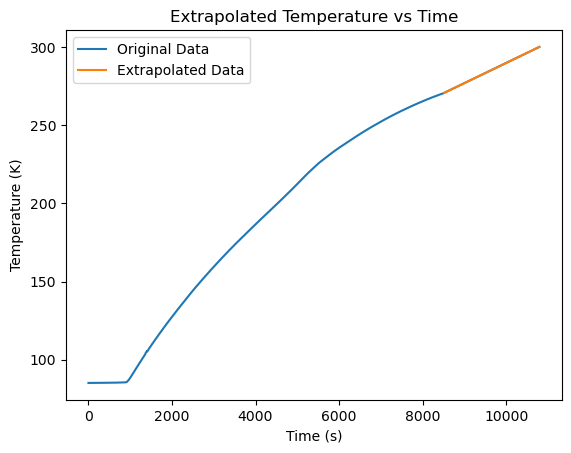

In [29]:
import matplotlib.pyplot as plt

# Plot original data
plt.plot(df_new['Time (s)'], df_new['T(K)'], label='Original Data')

# Plot extrapolated data
plt.plot(df_extrapolated['Time (s)'], df_extrapolated['T(K)'], label='Extrapolated Data')

# Set labels and title
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')
plt.title('Extrapolated Temperature vs Time')
plt.legend()

# Show the plot
plt.show()


In [30]:
df_new.to_excel('temp_extr.xlsx', index=False)

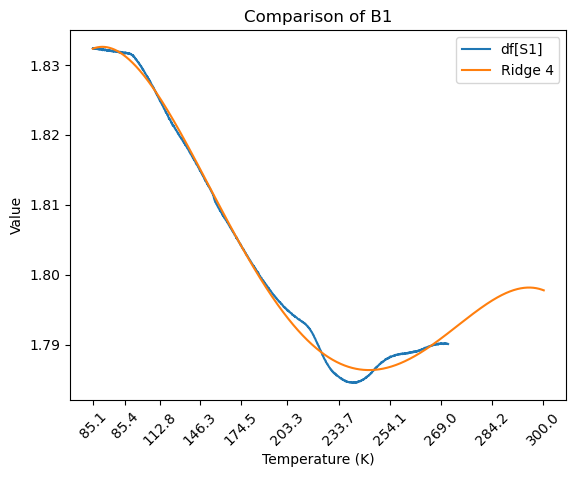

In [42]:
import matplotlib.pyplot as plt

# Plot df['S1'] vs temperature from df_new
plt.plot(df['Time (s)'], df['B1'], label='df[S1]')

# Plot preds2['Area'] vs temperature from df_new
plt.plot(preds2['Time (s)'], preds2['B1'], label='Ridge 4')

# Select 10 evenly spaced temperature values
temp_values = df_new['T(K)'].round(1)
step = max(len(temp_values) // 10, 1)  # Determine step size
temp_values = temp_values[::step]  # Select every 'step' value

# Set temperature values as x-axis ticks
plt.xticks(df_new['Time (s)'][::step], temp_values)

# Set labels and title
plt.xlabel('Temperature (K)')
plt.ylabel('Value')
plt.title('Comparison of B1')

# Show the legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


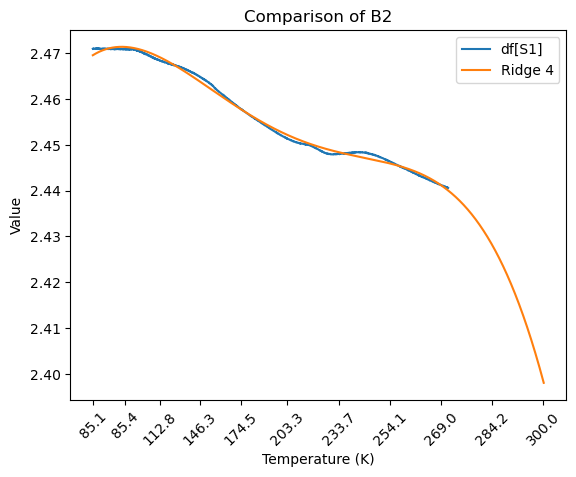

In [43]:
import matplotlib.pyplot as plt

# Plot df['S1'] vs temperature from df_new
plt.plot(df['Time (s)'], df['B2'], label='df[S1]')

# Plot preds2['Area'] vs temperature from df_new
plt.plot(preds2['Time (s)'], preds2['B2'], label='Ridge 4')

# Select 10 evenly spaced temperature values
temp_values = df_new['T(K)'].round(1)
step = max(len(temp_values) // 10, 1)  # Determine step size
temp_values = temp_values[::step]  # Select every 'step' value

# Set temperature values as x-axis ticks
plt.xticks(df_new['Time (s)'][::step], temp_values)

# Set labels and title
plt.xlabel('Temperature (K)')
plt.ylabel('Value')
plt.title('Comparison of B2')

# Show the legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


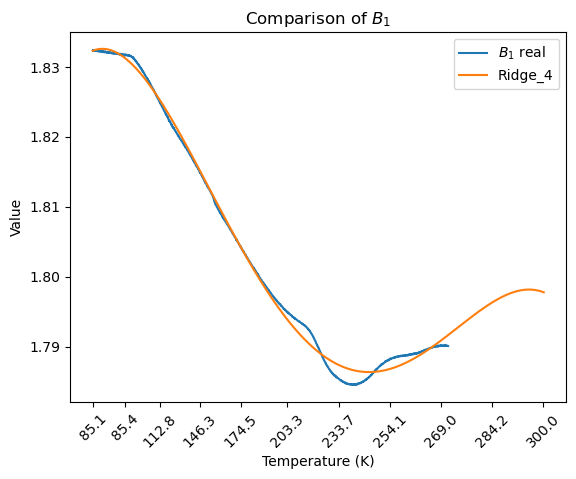

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import os

df = pd.read_excel('result_.xlsx')

filename = r'models\Ridge\Ridge_4.xlsx'
basename = os.path.basename(filename)
basename = os.path.splitext(basename)[0]


preds2 = pd.read_excel(filename)


# Plot df['S1'] vs temperature from df_new
plt.plot(df['Time (s)'], df['B1'], label='$B_1$ real')

# Plot preds2['Area'] vs temperature from df_new
plt.plot(preds2['Time (s)'], preds2['B1'], label=f'{basename}')

# Select 10 evenly spaced temperature values
temp_values = df_new['T(K)'].round(1)
step = max(len(temp_values) // 10, 1)  # Determine step size
temp_values = temp_values[::step]  # Select every 'step' value

# Set temperature values as x-axis ticks
plt.xticks(df_new['Time (s)'][::step], temp_values)

# Set labels and title
plt.xlabel('Temperature (K)')
plt.ylabel('Value')
plt.title('Comparison of $B_1$')

# Show the legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.savefig(f'B1_{basename}.png')
plt.show()



In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Create the 'B1' folder if it doesn't exist
output_folder = 'B2'
os.makedirs(output_folder, exist_ok=True)

# Load data from 'result_.xlsx'
df = pd.read_excel('result_.xlsx')

# Traverse through all subfolders and process each XLSX file
for root, dirs, files in os.walk('models'):
    for file in files:
        if file.endswith('.xlsx') and 'metrics' not in file.lower():
            # Read the XLSX file
            filename = os.path.join(root, file)
            preds2 = pd.read_excel(filename)

            # Extract basename without extension
            basename = os.path.splitext(os.path.basename(filename))[0]

            # Plot data
            plt.plot(df['Time (s)'], df['B2'], label='$B_2$ real')
            plt.plot(preds2['Time (s)'], preds2['B2'], label=basename)

            # Select 10 evenly spaced temperature values
            temp_values = df['T(K)'].round(1)
            step = max(len(temp_values) // 10, 1)
            temp_values = temp_values[::step]

            # Set temperature values as x-axis ticks
            plt.xticks(df['Time (s)'][::step], temp_values)

            # Set labels and title
            plt.xlabel('Temperature (K)')
            plt.ylabel('Value')
            plt.title(f'Comparison of $B_2$ for {basename}')

            # Show the legend
            plt.legend()

            # Rotate x-axis labels for better readability
            plt.xticks(rotation=45)

            # Save the plot in the 'B1' folder
            output_filename = os.path.join(output_folder, f'B2_{basename}.png')
            plt.savefig(output_filename)

            # Clear the plot for the next iteration
            plt.clf()

print("Processing completed.")


Processing completed.


<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Define the list of columns to process
columns_to_process = ['A1', 'A2', 'C1', 'C2']

# Load data from 'result_.xlsx'
df = pd.read_excel('result_.xlsx')

# Create folders if they don't exist
for column in columns_to_process:
    os.makedirs(column, exist_ok=True)

# Traverse through all subfolders and process each XLSX file
for root, dirs, files in os.walk('models'):
    for file in files:
        if file.endswith('.xlsx') and 'metrics' not in file.lower():
            # Read the XLSX file
            filename = os.path.join(root, file)
            preds2 = pd.read_excel(filename)

            # Extract basename without extension
            basename = os.path.splitext(os.path.basename(filename))[0]

            # Plot data for each column and save in corresponding folder
            for column in columns_to_process:
                plt.plot(df['Time (s)'], df[column], label=f'{column} real')
                plt.plot(preds2['Time (s)'], preds2[column], label=f'{basename} - {column}')

                # Select 10 evenly spaced temperature values
                temp_values = df['T(K)'].round(1)
                step = max(len(temp_values) // 10, 1)
                temp_values = temp_values[::step]

                # Set temperature values as x-axis ticks
                plt.xticks(df['Time (s)'][::step], temp_values)

                # Set labels and title
                plt.xlabel('Temperature (K)')
                plt.ylabel('Value')
                plt.title(f'Comparison of {column} for {basename}')

                # Show the legend
                plt.legend()

                # Rotate x-axis labels for better readability
                plt.xticks(rotation=45)

                # Save the plot in the corresponding folder
                output_folder = column
                output_filename = os.path.join(output_folder, f'{column}_{basename}.png')
                plt.savefig(output_filename)

                # Clear the plot for the next iteration
                plt.clf()

print("Processing completed.")


In [16]:
diff = max(preds2['Time (s)']) - max(df['Time (s)'])
diff

2291

In [15]:
max(df['Time (s)'])

8509

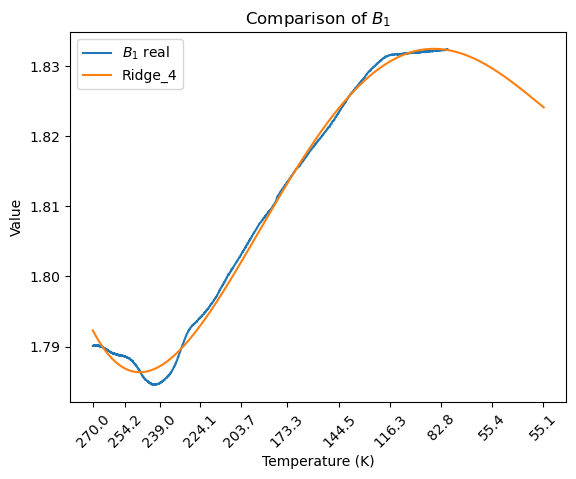

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import os

df = pd.read_excel('result_.xlsx')

df_new = pd.read_excel('temp_extr.xlsx')


filename = r'models revers\Ridge\Ridge_4.xlsx'
basename = os.path.basename(filename)
basename = os.path.splitext(basename)[0]


preds2 = pd.read_excel(filename)

diff = max(preds2['Time (s)']) - max(df['Time (s)'])


# Plot df['S1'] vs temperature from df_new
plt.plot(df['Time (s)'], df['B1'][::-1], label='$B_1$ real')

# Plot preds2['Area'] vs temperature from df_new
plt.plot(preds2['Time (s)'], preds2['B1'], label=f'{basename}')

# Select 10 evenly spaced temperature values
temp_values = df_new['T(K)'].round(1)
step = max(len(temp_values) // 10, 1)  # Determine step size
temp_values = temp_values[::step]  # Select every 'step' value

# Set temperature values as x-axis ticks
plt.xticks(df_new['Time (s)'][::step], round(temp_values[::-1]-30, 1))

# Set labels and title
plt.xlabel('Temperature (K)')
plt.ylabel('Value')
plt.title('Comparison of $B_1$')

# Show the legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.savefig(f'B1_{basename}.png')
plt.show()



In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Define the list of columns to process
columns_to_process = ['A1', 'A2', 'B1', 'B2', 'C1', 'C2']

# Load data from 'result_.xlsx'
df = pd.read_excel('result_.xlsx')

# Create folders if they don't exist
for column in columns_to_process:
    os.makedirs(column, exist_ok=True)

# Traverse through all subfolders and process each XLSX file
for root, dirs, files in os.walk('models revers'):
    for file in files:
        if file.endswith('.xlsx') and 'metrics' not in file.lower():
            # Read the XLSX file
            filename = os.path.join(root, file)
            preds2 = pd.read_excel(filename)

            # Extract basename without extension
            basename = os.path.splitext(os.path.basename(filename))[0]

            # Plot data for each column and save in corresponding folder
            for column in columns_to_process:
                plt.plot(df['Time (s)'], df[column][::-1], label=f'{column} real')
                plt.plot(preds2['Time (s)'], preds2[column], label=f'{basename} - {column}')

                # Select 10 evenly spaced temperature values
                temp_values = df_new['T(K)'].round(1)
                step = max(len(temp_values) // 10, 1)  # Determine step size
                temp_values = temp_values[::step]  # Select every 'step' value

                # Set temperature values as x-axis ticks
                plt.xticks(df_new['Time (s)'][::step], round(temp_values[::-1]-30, 1))


                # Set labels and title
                plt.xlabel('Temperature (K)')
                plt.ylabel('Value')
                plt.title(f'Comparison of {column} for {basename}')

                # Show the legend
                plt.legend()

                # Rotate x-axis labels for better readability
                plt.xticks(rotation=45)

                # Save the plot in the corresponding folder
                output_folder = column
                output_filename = os.path.join(output_folder, f'{column}_{basename}.png')
                plt.savefig(output_filename)

                # Clear the plot for the next iteration
                plt.clf()

print("Processing completed.")


Processing completed.


<Figure size 640x480 with 0 Axes>